In [55]:
import numpy as np
import scipy as sp
import scipy.integrate as integrate
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random as rn
from numpy import pi, cos, sin, mod, sqrt, cross, exp, meshgrid
from random import random, randint, choice
import matplotlib.colors as mcolors
from matplotlib.colors import hsv_to_rgb

In [79]:
N = 50
G = nx.Graph()
for i in range(N):
    for j in range(N):
        G.add_node((i,j), pos = (i,j))
for sour in G:
    i, j = sour
    G.add_edge(sour, ((i+1) % N, j))
    G.add_edge(sour, (i, (j+1) % N))
    

position = nx.get_node_attributes(G, 'pos')

# fig = plt.subplot()
# nx.draw(G, position, node_size = 15)
# fig.set_aspect('equal', 'box')

In [57]:
beta = 1

MetroSteps = 5*N**2

#Creating a randomized initial state
GroundState = np.zeros((N,N,2))
for sour in G:
    theta = random()*2*pi
    GroundState[sour] = np.array([cos(theta), sin(theta)])

for steps in range(MetroSteps):
    sour = choice(list(G.nodes()))
    theta = random()*2*pi
    flip = np.array([cos(theta), sin(theta)])
    Field = np.array([0.0,0.0])
    for NN in G[sour]:
        Field += GroundState[NN]
    dEnergy = -np.dot(Field, flip-GroundState[sour])
    p = random()
    if dEnergy < 0 or p < exp(-beta*dEnergy):
        GroundState[sour] = flip
# fig, ax = plt.subplots(figsize=(5, 5))
# for sour in G:
#     i, j = sour
#     spin = GroundState[sour]
#     ax.quiver(i, j, spin[0], spin[1], scale = 7)
# nx.draw(G, position, node_size = 15)
# ax.set_aspect('equal', 'box')
# plt.show()

9
8
7
6
5
4
3
2
1
0


In [ ]:
AngleField = np.zeros((N,N))
for sour in G:
    AngleField[sour] = np.angle(GroundState[sour][0]+1j*GroundState[sour][1])

plt.imshow(np.transpose(AngleField), origin = 'lower')
plt.hsv()

plt.colorbar(location = 'left', label = ' Phase')

In [155]:
MetroSteps = 5*N**2

#Creating a randomized initial state
GroundState = np.zeros((N,N,2))
for sour in G:
    #theta = random()*2*pi
    theta = 0
    GroundState[sour] = np.array([cos(theta), sin(theta)])

Trange = 10
corr = np.zeros((N, Trange))
Tlist = []
for ii in range(Trange):
    T = ii/5
    Tlist.append(T)
    ncorr = np.zeros((N,MetroSteps))
    for step in range(MetroSteps):
        sour = choice(list(G.nodes()))
        theta = random()*2*pi
        flip = np.array([cos(theta), sin(theta)])
        Field = np.array([0.0,0.0])
        for NN in G[sour]:
            Field += GroundState[NN]
        dEnergy = -np.dot(Field, flip-GroundState[sour])
        p = random()
        if dEnergy < 0 or p < exp(-dEnergy/T):
            GroundState[sour] = flip
        r_sum = np.zeros(N)
        r_sample = np.zeros(N)
        for i in range(N):
            for j in range(N):
                r_sum[abs(i-j)] += np.dot(GroundState[i,i], (GroundState[i,j]+GroundState[j,i]))
                r_sample[abs(i-j)] += 2
        ncorr[:,step] = r_sum/r_sample
    corr[:,ii] = np.mean(ncorr, axis = 1)

C:\Users\jamal\AppData\Local\Temp\ipykernel_31532\2774345322.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  if dEnergy < 0 or p < exp(-dEnergy/T):


In [197]:
np.savetxt("corr.txt", corr)

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.98584189,  0.96410277,  0.92362386,  0.84965413,
         0.78241348,  0.73013365,  0.57889021,  0.48661508,  0.41932266],
       [ 1.        ,  0.9821723 ,  0.95288541,  0.8980184 ,  0.80639384,
         0.72448388,  0.69143454,  0.49489002,  0.34448365,  0.25808679],
       [ 1.        ,  0.98658302,  0.94349743,  0.89694837,  0.81780666,
         0.72390633,  0.61553632,  0.47193189,  0.34330502,  0.23879196],
       [ 1.        ,  0.98688795,  0.95554584,  0.90920514,  0.83176399,
         0.7297025 ,  0.65030359,  0.50231623,  0.30055104,  0.24743501],
       [ 1.        ,  0.98471639,  0.95699702,  0.90762783,  0.82065458,
         0.73764182,  0.65591302,  0.51256945,  0.30959423,  0.18988281],
       [ 1.        ,  0.98731046,  0.96540737,  0.93082485,  0.85366805,
         0.73274716,  0.65041791,  0.49476721

In [109]:
MetroSteps = 5*N**2

#Creating a randomized initial state
GroundState = np.zeros((N,N,2))
for sour in G:
    #theta = random()*2*pi
    theta = 0
    GroundState[sour] = np.array([cos(theta), sin(theta)])
T = 0
maglist = np.zeros((100, 2))
Tlist = []

for i in range(100):
    T = i/50
    Tlist.append(T)
    for step in range(MetroSteps):
        sour = choice(list(G.nodes()))
        theta = random()*2*pi
        flip = np.array([cos(theta), sin(theta)])
        Field = np.array([0.0,0.0])
        for NN in G[sour]:
            Field += GroundState[NN]
        dEnergy = -np.dot(Field, flip-GroundState[sour])
        p = random()
        if dEnergy < 0 or p < exp(-dEnergy/T):
            GroundState[sour] = flip
        r_sum = np.zeros(N)
        r_sample = np.zeros(N)
    for sour in G:
        maglist[i] += GroundState[sour]
    maglist[i] = maglist[i]/(N**2)


C:\Users\jamal\AppData\Local\Temp\ipykernel_31532\3287308156.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  if dEnergy < 0 or p < exp(-dEnergy/T):


Text(0.5, 0, '$Tk_B$')

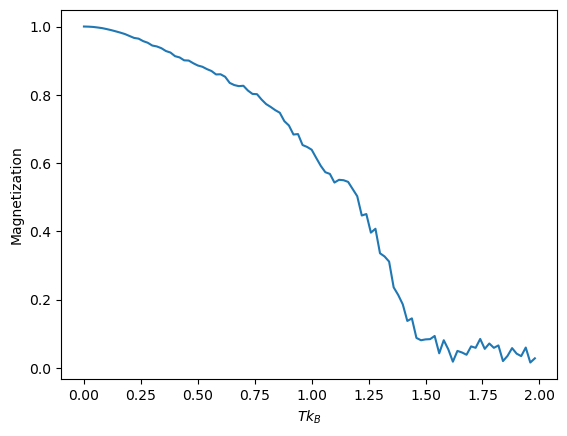

In [113]:
magabs = sqrt(np.sum(maglist**2, axis = 1))
plt.plot(Tlist, magabs)
plt.ylabel("Magnetization")
plt.xlabel(f'$Tk_B$')

In [139]:
MetroSteps = 5*N**2

#Creating a randomized initial state
GroundState = np.zeros((N,N,2))
for sour in G:
    #theta = random()*2*pi
    theta = 0
    GroundState[sour] = np.array([cos(theta), sin(theta)])
T = 0
maglist = np.zeros((100, 2))
Tlist = []
vortexlist = np.zeros(100)
for ii in range(100):
    T = ii/50
    Tlist.append(T)
    for step in range(MetroSteps):
        sour = choice(list(G.nodes()))
        theta = random()*2*pi
        flip = np.array([cos(theta), sin(theta)])
        Field = np.array([0.0,0.0])
        for NN in G[sour]:
            Field += GroundState[NN]
        dEnergy = -np.dot(Field, flip-GroundState[sour])
        p = random()
        if dEnergy < 0 or p < exp(-dEnergy/T):
            GroundState[sour] = flip
        r_sum = np.zeros(N)
        r_sample = np.zeros(N)
        
    for i in range(N-1):
        for j in range(N-1):
            detlist = []
            detlist.append(GroundState[i,j,0]*GroundState[i+1, j, 1]-GroundState[i,j,1]*GroundState[i+1, j, 0])
            detlist.append(GroundState[i+1,j,0]*GroundState[i+1, j+1, 1]-GroundState[i+1,j,1]*GroundState[i+1, j+1, 0])
            detlist.append(GroundState[i+1,j+1,0]*GroundState[i, j+1, 1]-GroundState[i+1,j+1,1]*GroundState[i, j+1, 0])
            detlist.append(GroundState[i,j+1,0]*GroundState[i, j, 1]-GroundState[i,j+1,1]*GroundState[i, j, 0])
            detlist = [np.sign(det) for det in detlist]
            if abs(sum(detlist)) == 4:
                vortexlist[ii] += 1
            

C:\Users\jamal\AppData\Local\Temp\ipykernel_31532\740168310.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  if dEnergy < 0 or p < exp(-dEnergy/T):


Text(0, 0.5, 'Number of Vortices')

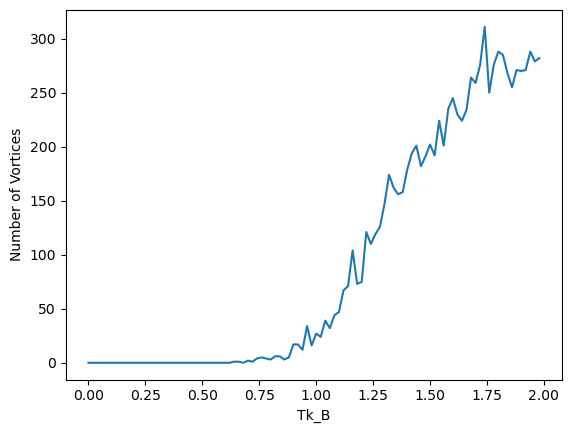

In [140]:
plt.plot(Tlist,vortexlist)
plt.xlabel(f'Tk_B')
plt.ylabel("Number of Vortices")